<a href="https://colab.research.google.com/github/lmhoang47/CS2225.CH1501/blob/taivct_lab03/lab-03/ImageAIDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare


Run these following snippet code to prepare data:

* Install libraries:

In [ ]:
!pip3 install -U tensorflow keras opencv-python
!pip3 install imageai --upgrade

* Download trained models:

In [ ]:
# Prediction model
!wget https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5

# Detection model
!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5
!ls -llH

* Download some example images (optional)

In [ ]:
!wget -O stadium.jpg https://www.wembleystadium.com/-/media/Project/WembleyStadium/plan-your-visit/match-day-inside-wembley-stadium_800.ashx
!wget -O dog.jpg https://bgr.com/wp-content/uploads/2016/11/puppy-dog.jpg?quality=70&strip=all&w=782
!wget -O brigde.jpg https://i.insider.com/5930700eb74af46e008b5d69?width=1136&format=jpeg

# Image Prediction 

Run an image-prediction program with ImageAI's APIs: 

Upload an image to predict: 


Saving 10636556_728742883863599_8196947767165230238_o.jpg to 10636556_728742883863599_8196947767165230238_o.jpg
Prediction results: 
drilling_platform  :  98.4003484249115
stage  :  0.53413026034832
fountain  :  0.2545422874391079


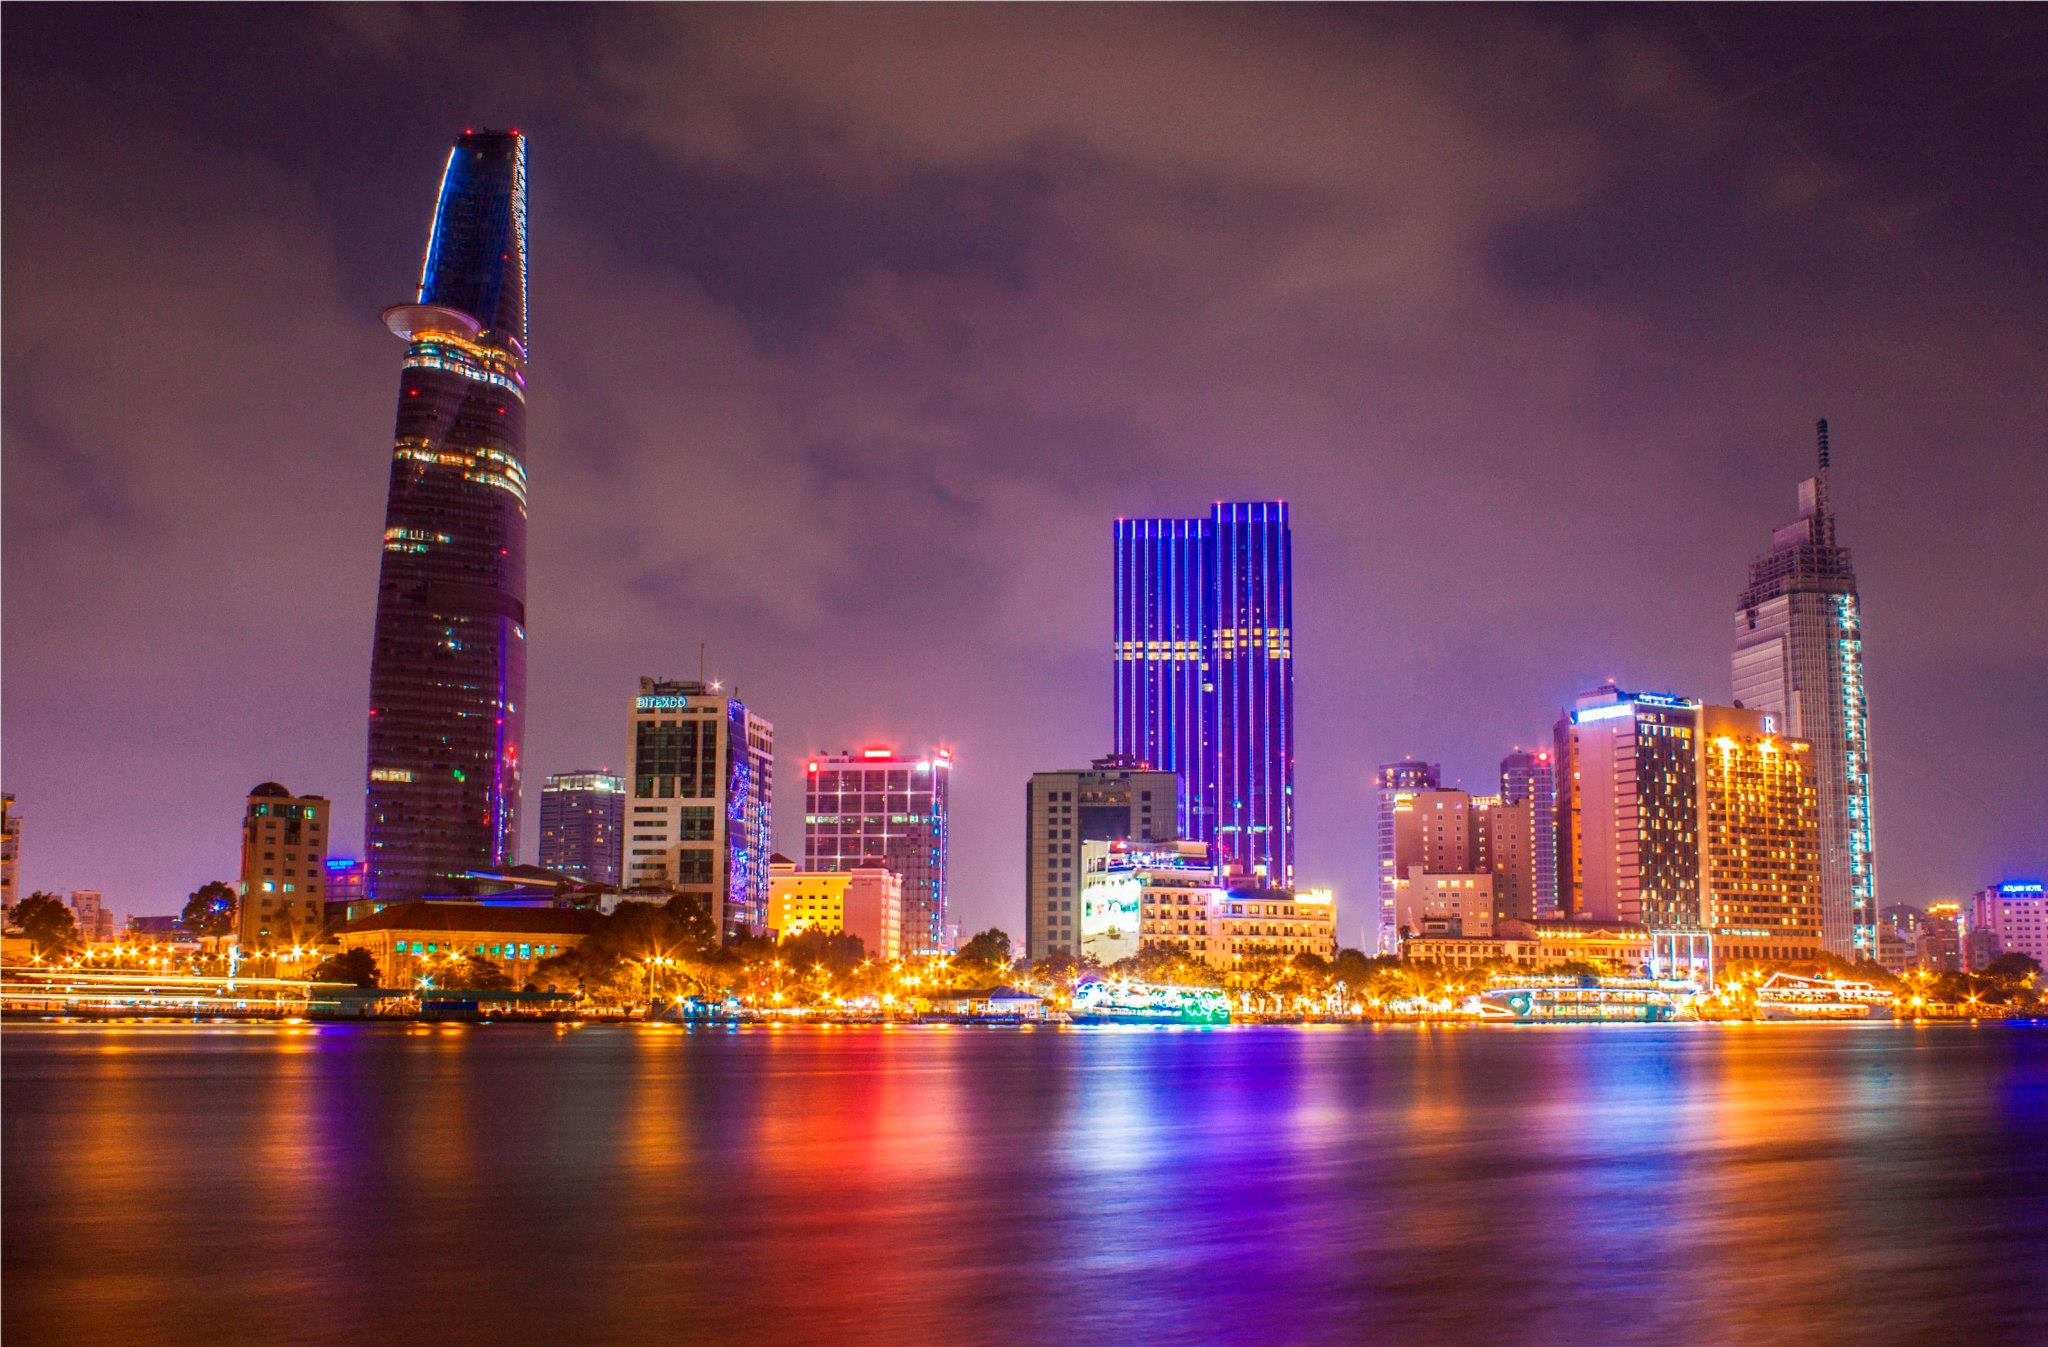

In [16]:
# Prediction
from IPython.display import Image
import os
from google.colab import files
from imageai.Prediction import ImagePrediction

# Prepare model
execution_path = os.getcwd()
model_path = os.path.join(execution_path, "resnet50_weights_tf_dim_ordering_tf_kernels.h5")

prediction = ImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(model_path)
prediction.loadModel()

# Upload images
print("Upload an image to predict: ")
uploaded = files.upload()
predict_picture = list(uploaded.keys())[0] # only process one image

# Predict
print("Prediction results: ")
MAX_PREDICTION = 3
predictions, probabilities = prediction.predictImage(os.path.join(execution_path, predict_picture), result_count = MAX_PREDICTION )
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

display(Image(predict_picture, width= 400, height=300))

# Image Detection

Under construction (Not work)

In [ ]:
# Detection
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "1.jpg"), output_image_path=os.path.join(execution_path , "imagedetection.jpg"))

for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )